# Simple linear algebra with NumPy

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Some simple practice data
Replace with your own if you feel like it

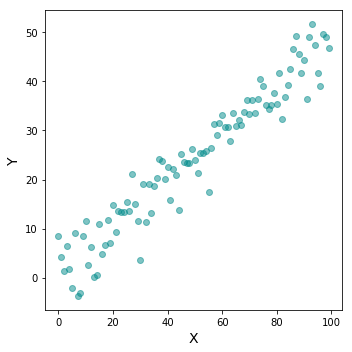

In [47]:
y = np.array([1, 2, 3, 3, 4])
x = np.array([6, 7, 8, 9, 7])

x = np.arange(100)
y = 0.1 + 0.5*x + np.random.normal(0, 4, (x.size))

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'o', alpha=0.5, c="#008b8b")
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.tight_layout()
plt.savefig("../../slides/html/img/Lesson_5/la_data.png", dpi=360, transparent=True, bbox_inches="tight")
plt.show()

## The dreaded algebra
\begin{equation}
y = bX
\end{equation}

To solve for $b$, we need to marginalise $X$, and to do that we need to make it a _square_, symmetric matrix. To make it square we multiply both sides of the equation by $X'$

\begin{equation}
X'y = bX'X
\end{equation}

We denote the square matrix as $(X'X)$ and this will have an inverse which we denote as $(X'X)^{-1}$. To marginalise out the square matrix, we need to multiply both sides of the equation by **this** inverse.

\begin{equation}
(X'X)^{-1}X'y = b(X'X)^{-1}X'X
\end{equation}

A square matrix multiplied by its inverse is equal to the identity matrix:
\begin{equation}
I = (X'X)^{-1}X'X
\end{equation}

and a matrix multiplied by the $I$ equals itself.

\begin{equation}
(X'X)^{-1}X'y = bI
\end{equation}

Consequently our unknown $b$ can be represented by:

\begin{equation}
b = X'(X'X)^{-1}y
\end{equation}

**Now let's implement the above using our NumPy library**

Remember that $X$ is expressed as:

\begin{equation}
X = 1 + \sum_{i=1}^{N}x_{i}
\end{equation}

In [38]:
ones = np.ones(x.size)
X_d = np.stack((ones, x)).T
print(X_d)

[[  1.   0.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]
 [  1.  13.]
 [  1.  14.]
 [  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]
 [  1.  20.]
 [  1.  21.]
 [  1.  22.]
 [  1.  23.]
 [  1.  24.]
 [  1.  25.]
 [  1.  26.]
 [  1.  27.]
 [  1.  28.]
 [  1.  29.]
 [  1.  30.]
 [  1.  31.]
 [  1.  32.]
 [  1.  33.]
 [  1.  34.]
 [  1.  35.]
 [  1.  36.]
 [  1.  37.]
 [  1.  38.]
 [  1.  39.]
 [  1.  40.]
 [  1.  41.]
 [  1.  42.]
 [  1.  43.]
 [  1.  44.]
 [  1.  45.]
 [  1.  46.]
 [  1.  47.]
 [  1.  48.]
 [  1.  49.]
 [  1.  50.]
 [  1.  51.]
 [  1.  52.]
 [  1.  53.]
 [  1.  54.]
 [  1.  55.]
 [  1.  56.]
 [  1.  57.]
 [  1.  58.]
 [  1.  59.]
 [  1.  60.]
 [  1.  61.]
 [  1.  62.]
 [  1.  63.]
 [  1.  64.]
 [  1.  65.]
 [  1.  66.]
 [  1.  67.]
 [  1.  68.]
 [  1.  69.]
 [  1.  70.]
 [  1.  71.]
 [  1.  72.]
 [  1.  73.]
 [  1.  74.]
 [  1.  75.]
 [  1.  76.]

In [39]:
X_sq = np.dot(X_d.T, X_d)
print(X_sq)

[[  1.00000000e+02   4.95000000e+03]
 [  4.95000000e+03   3.28350000e+05]]


In [33]:
X_inv = np.linalg.inv(X_sq)
print(X_inv)

[[  3.94059406e-02  -5.94059406e-04]
 [ -5.94059406e-04   1.20012001e-05]]


In [35]:
Xy = np.dot(X_d.T, y)
print(Xy)

[   2509.45773951  167396.25414056]


In [36]:
b = np.dot(Xy, X_inv)
print(b)

[-0.55577668  0.51818897]


In [37]:
print("Our linear solution is:\n\ty = {0:.2f} + {1:.2f}x".format(*tuple(b)))

Our linear solution is:
	y = -0.56 + 0.52x


In [42]:
def lin_mod(x, a, b):
    return a + b*x

model = lin_mod(x, *b)
print(model)

[ -5.55776685e-01  -3.75877136e-02   4.80601258e-01   9.98790229e-01
   1.51697920e+00   2.03516817e+00   2.55335714e+00   3.07154611e+00
   3.58973509e+00   4.10792406e+00   4.62611303e+00   5.14430200e+00
   5.66249097e+00   6.18067994e+00   6.69886891e+00   7.21705788e+00
   7.73524686e+00   8.25343583e+00   8.77162480e+00   9.28981377e+00
   9.80800274e+00   1.03261917e+01   1.08443807e+01   1.13625697e+01
   1.18807586e+01   1.23989476e+01   1.29171366e+01   1.34353255e+01
   1.39535145e+01   1.44717035e+01   1.49898925e+01   1.55080814e+01
   1.60262704e+01   1.65444594e+01   1.70626483e+01   1.75808373e+01
   1.80990263e+01   1.86172153e+01   1.91354042e+01   1.96535932e+01
   2.01717822e+01   2.06899711e+01   2.12081601e+01   2.17263491e+01
   2.22445381e+01   2.27627270e+01   2.32809160e+01   2.37991050e+01
   2.43172939e+01   2.48354829e+01   2.53536719e+01   2.58718609e+01
   2.63900498e+01   2.69082388e+01   2.74264278e+01   2.79446167e+01
   2.84628057e+01   2.89809947e+01

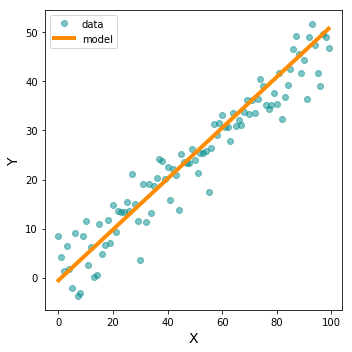

In [51]:
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'o', alpha=0.5, c="#008b8b", label="data")
plt.plot(x, model, '-', lw=4, c='darkorange', label="model")
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.tight_layout()
plt.legend(loc="upper left")
plt.savefig("../../slides/html/img/Lesson_5/la_model.png", dpi=360, transparent=True, bbox_inches="tight")
plt.show()